# Import libraries

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Import dataset and understand

In [2]:
df=pd.read_csv('Mall_Customers.csv')
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


# Data preprocessing

In [4]:
df.drop(columns=['CustomerID'], inplace=True)
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [5]:
#rename
df=df.rename(columns={'Annual Income (k$)':'Annual_Income(k$)','Spending Score (1-100)':'Spending_Score(1-100)'})
df             

,Gender,Age,Annual_Income(k$),Spending_Score(1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


In [6]:
df.shape

(200, 4)

In [7]:
#checking  and handling missing values
missing_values_count = df.isnull().sum()
missing_values_count


#there is no missing values

Gender                   0
Age                      0
Annual_Income(k$)        0
Spending_Score(1-100)    0
dtype: int64

# feature selection

In [62]:
#use features only Annual_Income(k$),Spending_Score(1-100)
x=df.iloc[:,[2,3]].values
x

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

# k-means clustering

   # choosing the number of clusters using WCSS and plotting an elbow graph 

finding wcss(with in cluster sum of squares) value for different number of clusters:goal is to mimimize it by finding the optimal centroids that minimize the distance between the data points and their corresponding centroids.

elbow method(it plot wcss value) :is a technique to find the optimal number of clusters by observing the "elbow" point in the WCSS plot.

In [10]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler,OneHotEncoder

In [17]:

wcss=[]

for i in range(1,16):  #will take 15 clusters
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=56)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


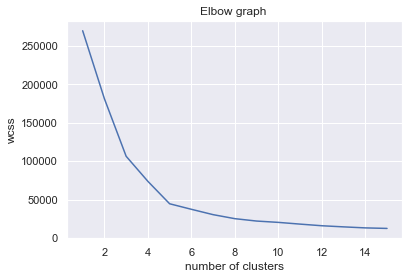

In [18]:
#using plotting elbow graph we will check which  cluster got least sum of squares
sns.set()
plt.figure()
plt.plot(range(1,16),wcss)
plt.title('Elbow graph ')
plt.xlabel('number of clusters')
plt.ylabel('wcss')
plt.show()


#In the above elbow graph there is  two elbow point but the last drop point is at  5 so we take optimum number of cluster as k=5.

# train the model using k=5

In [43]:
kmeans=KMeans(n_clusters=5,init='k-means++',random_state=32)

#return a label for each cluster 
y=kmeans.fit_predict(x)
print(y)

[4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4
 0 4 0 4 0 4 1 4 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 3 2 1 2 3 2 3 2 1 2 3 2 3 2 3 2 3 2 1 2 3 2 3 2
 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3
 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2]


# visualizing all clusters with their centroids

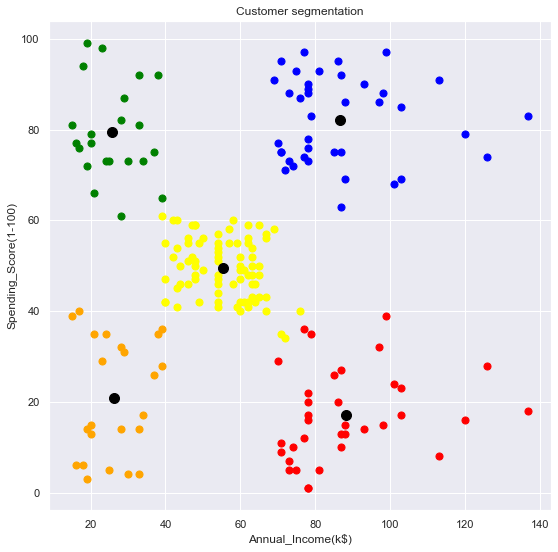

In [44]:
plt.figure(figsize=(9,9))
plt.scatter(x[y==0,0],x[y==0,1],s=50,c='green',label='cluster0')
plt.scatter(x[y==1,0],x[y==1,1],s=50,c='yellow',label='cluster1')
plt.scatter(x[y==2,0],x[y==2,1],s=50,c='blue',label='cluster2')
plt.scatter(x[y==3,0],x[y==3,1],s=50,c='red',label='cluster3')
plt.scatter(x[y==4,0],x[y==4,1],s=50,c='orange',label='cluster4')

#plot centroids
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,c='black',label='Centroids')
plt.title('Customer segmentation')
plt.xlabel('Annual_Income(k$)')
plt.ylabel('Spending_Score(1-100)')
plt.show()

#  Interpreting clusters 

   To know the mean and standard deviation,and also count the number of data points in each cluster.
    example:A large number of data is clustered in "cluster0"

In [53]:
import pandas as pd
import numpy as np


# Create a DataFrame to store the original data along with cluster labels
clustered_data = pd.DataFrame({'Annual_Income': x[:, 0], 'Spending_Score': x[:, 1], 'Cluster': y})

# Group data by cluster and calculate summary statistics
cluster_summary = clustered_data.groupby('Cluster').agg({'Annual_Income': ['mean', 'std'],
                                                        'Spending_Score': ['mean', 'std'],
                                                        'Cluster': 'count'})

# Print cluster summary
print(cluster_summary)




        Annual_Income            Spending_Score            Cluster
                 mean        std           mean        std   count
Cluster                                                           
0           25.727273   7.566731      79.363636  10.504174      22
1           55.296296   8.988109      49.518519   6.530909      81
2           86.538462  16.312485      82.128205   9.364489      39
3           88.200000  16.399067      17.114286   9.952154      35
4           26.304348   7.893811      20.913043  13.017167      23


# Segment profiling 

  this tell us the average value of each clusters for each features (Annual_Income and  Spending_Score).

In [54]:
# Calculate the center (centroid) of each cluster
cluster_centers = kmeans.cluster_centers_

# Create a DataFrame to store segment profiles
segment_profiles = pd.DataFrame(cluster_centers, columns=['Annual_Income', 'Spending_Score'])

# Add a 'Segment' column to identify each segment
segment_profiles['Segment'] = segment_profiles.index

# Sort the segment profiles by Spending_Score
segment_profiles = segment_profiles.sort_values(by='Spending_Score')
print(segment_profiles)


   Annual_Income  Spending_Score  Segment
3      88.200000       17.114286        3
4      26.304348       20.913043        4
1      55.296296       49.518519        1
0      25.727273       79.363636        0
2      86.538462       82.128205        2


# Predict the cluster for new data points

In [45]:
# Define the specific data point for prediction
new_point = np.array([[70, 84]])

# Predict the cluster for the new point using the fitted KMeans model
new_point_cluster = kmeans.predict(new_point)

print(f"Predicted cluster for the point (20, 20): {new_point_cluster[0]}")

Predicted cluster for the point (20, 20): 2


In [47]:
# Define the specific data point for prediction
new_point = np.array([[170, 32]])

# Predict the cluster for the new point using the fitted KMeans model
new_point_cluster = kmeans.predict(new_point)

print(f"Predicted cluster for the point (170, 32): {new_point_cluster[0]}")

Predicted cluster for the point (170, 32): 3


In [59]:
# Save the model to a .pkl file
import pickle
model_filename = 'kmeans_model.pkl'
with open(model_filename, 'wb') as model_file:
    pickle.dump(kmeans, model_file)
print('Saved!')

Saved!
